## Student Performance Indicator

#### Life Cycle of ML Project

###### 1. Understanding the Problem Statement
###### 2. Data Collection
###### 3. Data Checks to perform
###### 4. Exploratory Data Analyysis
###### 5. Data Preprocessing
###### 6. Model Training
###### 7. Choose best model


#### Problem Statement

###### The Project understands how the student's performance is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

#### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading the file , getting the data frame

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

#### Show top 5 records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Data Checks to Perform
##### 1. check missing value
##### 2. check duplicates
##### 3. check datatype
##### 4. check the number of unique values of each column
##### 5. check statistics of data set
##### 6. check various categories present in different categorical column

##### 1. Check missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### 2. Check duplicates

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

##### 3. Check Datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 4. Number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### 5. Check statistics of dataset 

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### various categories present in different

In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [13]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Seperating object and numerical features

In [15]:
type(df.columns)

pandas.core.indexes.base.Index

In [16]:
lst = list(df.columns)

In [17]:
lst

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [18]:
numerical = [features for features in df.columns if df[features].dtype != 'O']
categorical = [features for features in df.columns if df[features].dtype=='O']

In [19]:
numerical

['math score', 'reading score', 'writing score']

In [20]:
categorical

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [21]:
print('we have {} numerical features : {}'.format(len(numerical),numerical))

we have 3 numerical features : ['math score', 'reading score', 'writing score']


In [22]:
print('we have {} categorical features : {}'.format(len(categorical),categorical))

we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##### Feature Engineering -> Adding new columns that makes sense

In [23]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


###### here we have 3 scores , we can take average of these scores

In [24]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average_score'] = df['total_score']/3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Number of students with full marks in maths reading and writing 

In [27]:
df.describe()

,math score,reading score,writing score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [25]:
reading_full = df[df['reading score']==100]['average_score'].count()


In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [38]:
df[df['math score']>80].count()

gender                         176
race/ethnicity                 176
parental level of education    176
lunch                          176
test preparation course        176
math score                     176
reading score                  176
writing score                  176
total_score                    176
average_score                  176
dtype: int64

In [39]:
df[df['reading score']>80].count()

gender                         235
race/ethnicity                 235
parental level of education    235
lunch                          235
test preparation course        235
math score                     235
reading score                  235
writing score                  235
total_score                    235
average_score                  235
dtype: int64

In [40]:
df[df['writing score']>80].count()

gender                         208
race/ethnicity                 208
parental level of education    208
lunch                          208
test preparation course        208
math score                     208
reading score                  208
writing score                  208
total_score                    208
average_score                  208
dtype: int64

### Visualizing average score distribution to make some conclusions

<Axes: xlabel='average_score', ylabel='Count'>

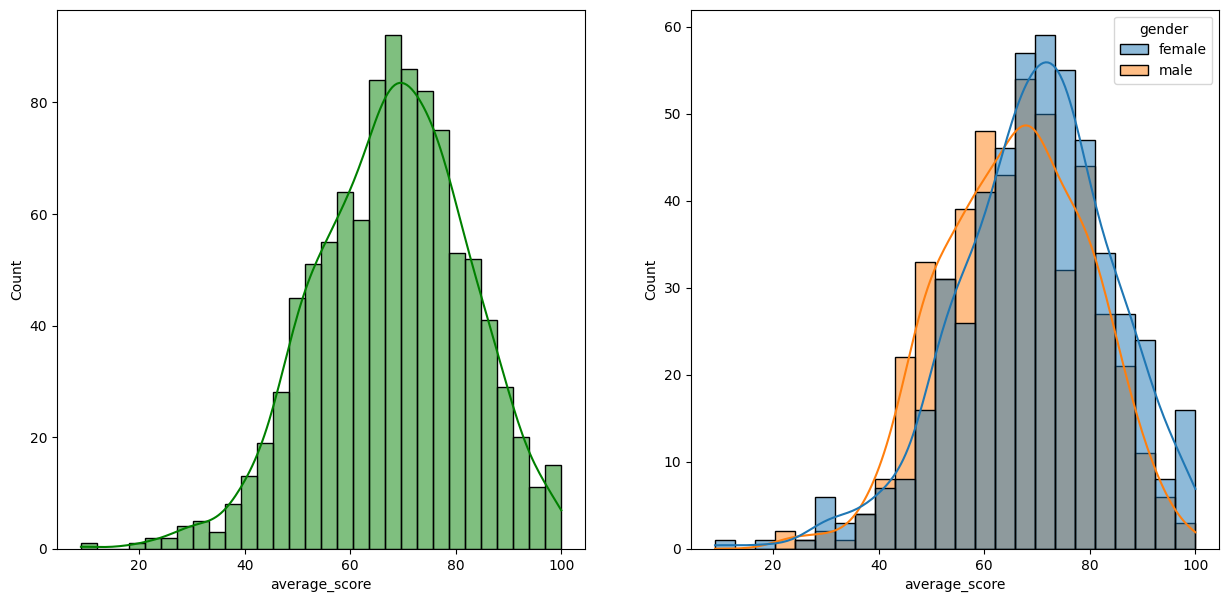

In [43]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')

#### female students tend to perform well then male students

In [45]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


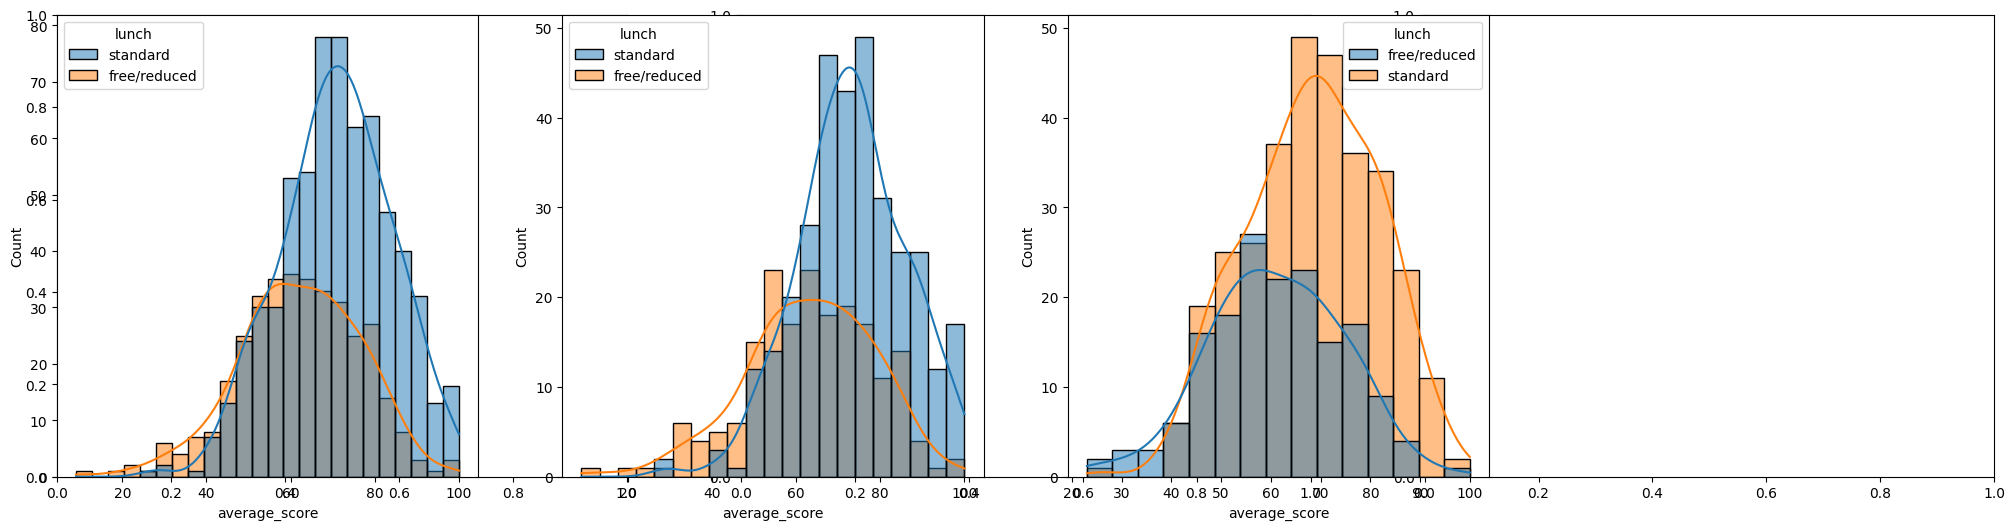

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',hue='lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='lunch',kde=True)
plt.show()

#### parents education 

In [53]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


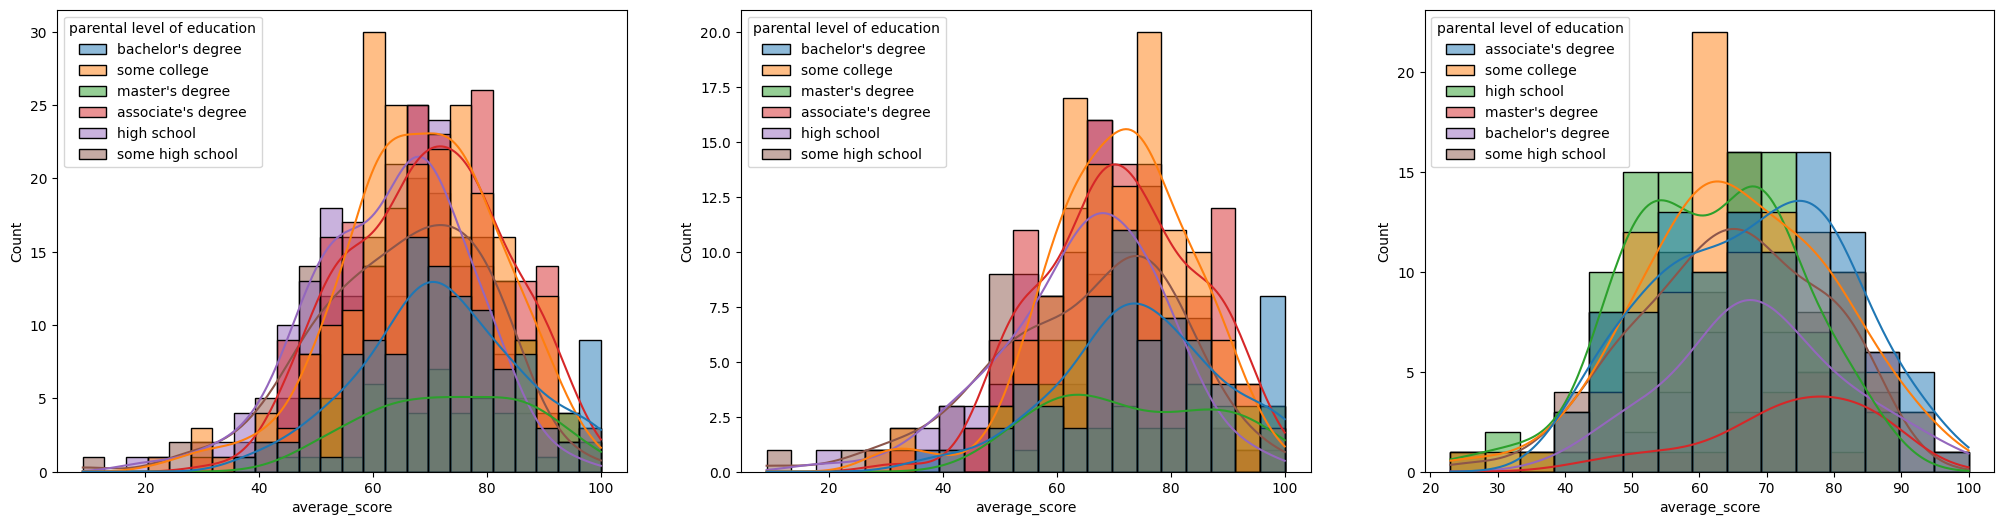

In [56]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',hue='parental level of education',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='parental level of education',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='parental level of education',kde=True)
plt.show()